# Tensorflow version 2.12.0 사용

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

tf.__version__

'2.12.0'

In [3]:
(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()   # 데이터 불러오기 

x_train=x_train.reshape(-1, 28, 28, 1)   # 텐서로 변환 ( -1, 높이, 너비, 채널)
x_test=x_test.reshape(-1, 28, 28, 1)     # 텐서로 변환 ( -1, 높이, 너비, 채널)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

x_train = x_train.astype(np.float32) / 255.0  # 정규화 
x_test = x_test.astype(np.float32) / 255.0    # 정규화 

(60000, 28, 28, 1) (10000, 28, 28, 1)
(60000,) (10000,)


<img src = "http://cmseng.skku.edu/CMSLecture/ML/img/21-5.png" style="max-width: 60%; height: auto;"> <p>

In [4]:
cnn = Sequential()

cnn.add(Conv2D(input_shape=(28,28,1), kernel_size=(3,3),
               filters=32, activation='relu', padding='valid'))
cnn.add(Conv2D(kernel_size=(3,3), filters=64, activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())

cnn.add(Dense(128, activation='relu'))      # 은닉층 
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax'))    # 출력층 

In [5]:
import pandas as pd

DF=pd.DataFrame(y_train) # 정답(레이블)값이 정수. 
DF.head()

,0
0,5
1,0
2,4
3,1
4,9


In [5]:
cnn.compile(loss='sparse_categorical_crossentropy',
            optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [6]:
hist = cnn.fit(x_train, y_train, batch_size=128, 
               epochs=30, validation_data=(x_test, y_test), verbose=1)

Epoch 1/30
469/469 [==============================] - 37s 79ms/step - loss: 0.5196 - accuracy: 0.8181 - val_loss: 0.3398 - val_accuracy: 0.8790
Epoch 2/30
469/469 [==============================] - 37s 79ms/step - loss: 0.3428 - accuracy: 0.8791 - val_loss: 0.2893 - val_accuracy: 0.8934
Epoch 3/30
469/469 [==============================] - 39s 83ms/step - loss: 0.2933 - accuracy: 0.8945 - val_loss: 0.2621 - val_accuracy: 0.9012
Epoch 4/30
469/469 [==============================] - 45s 96ms/step - loss: 0.2616 - accuracy: 0.9050 - val_loss: 0.2460 - val_accuracy: 0.9104
Epoch 5/30
469/469 [==============================] - 38s 80ms/step - loss: 0.2398 - accuracy: 0.9122 - val_loss: 0.2394 - val_accuracy: 0.9152
Epoch 6/30
469/469 [==============================] - 38s 82ms/step - loss: 0.2254 - accuracy: 0.9164 - val_loss: 0.2231 - val_accuracy: 0.9205
Epoch 7/30
469/469 [==============================] - 39s 83ms/step - loss: 0.2042 - accuracy: 0.9249 - val_loss: 0.2196 - val_accuracy:

In [7]:
cnn.evaluate(x_test, y_test,verbose=2)

313/313 - 2s - loss: 0.2690 - accuracy: 0.9327 - 2s/epoch - 7ms/step


[0.2689622938632965, 0.932699978351593]

In [8]:
import pandas as pd

history_DF=pd.DataFrame(hist.history)
history_DF

,loss,accuracy,val_loss,val_accuracy
0,0.519556,0.818133,0.339803,0.8790
1,0.342755,0.879100,0.289342,0.8934
2,0.293297,0.894533,0.262063,0.9012
3,0.261563,0.904950,0.245978,0.9104
4,0.239801,0.912250,0.239353,0.9152
5,0.225361,0.916367,0.223118,0.9205
6,0.204159,0.924933,0.219587,0.9218
7,0.191318,0.929267,0.221497,0.9224
8,0.177671,0.933883,0.224634,0.9242
9,0.166823,0.938550,0.210364,0.9277


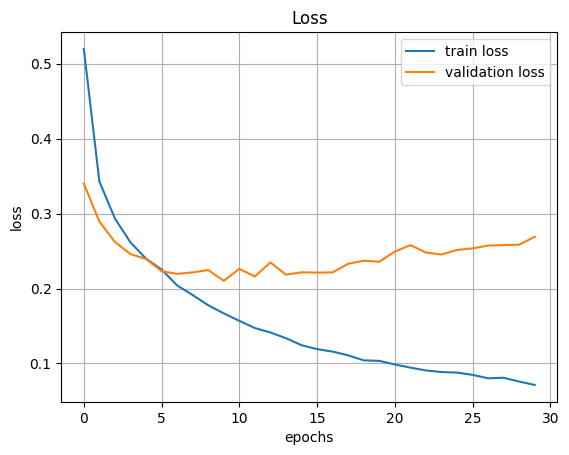

In [9]:
import matplotlib.pyplot as plt

plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')

plt.show()

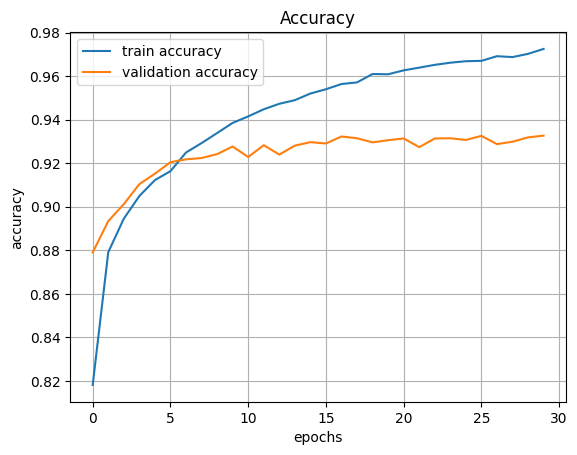

In [10]:
import matplotlib.pyplot as plt

plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')

plt.legend(loc='best')

plt.show()

<img src = "http://cmseng.skku.edu/CMSLecture/ML/img/21-6.png" style="max-width: 60%; height: auto;">